In [6]:
using Revise
includet("utils/file_reader.jl")
includet("utils/some_data.jl")
includet("utils/utils_graph.jl")
includet("resolution/compact/compact_formulation.jl")
includet("resolution/path/path_generation.jl")
includet("utils/visu.jl")

In [7]:
instance = get_instance_from_folder("instances/tests2/pathbetter")

InstanceVNE(Any[Meta graph based on a SimpleDiGraph{Int64} with vertex labels of type Int64, vertex metadata of type Dict, edge metadata of type Dict, graph metadata given by Dict(:type => "virtual", :name => "virt"), and default weight 1.0], Meta graph based on a SimpleDiGraph{Int64} with vertex labels of type Int64, vertex metadata of type Dict, edge metadata of type Dict, graph metadata given by Dict(:type => "substrate", :name => "Aarnet"), and default weight 1.0)

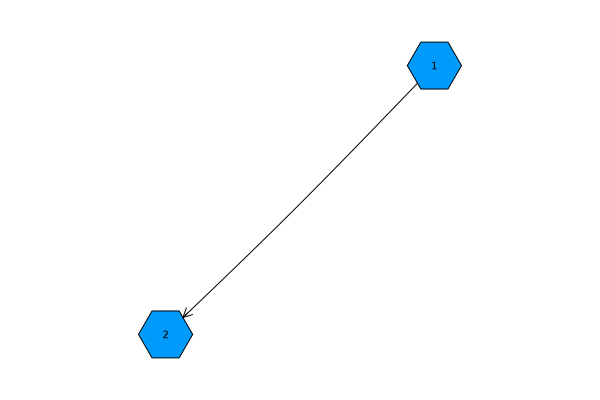

In [8]:
visu_graph(instance.v_networks[1])

In [9]:
print_virtual(instance.v_networks[1])

Metagraph 
Node 1 with dem 1
Node 2 with dem 1
Edge Edge 1 => 2 with dem 1


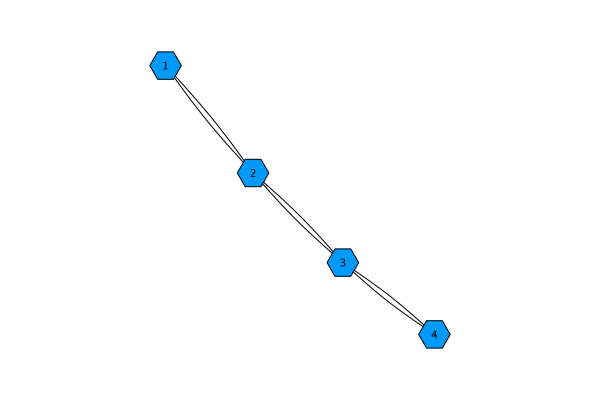

In [10]:
visu_graph(instance.s_network)

In [11]:
print_substrate(instance.s_network)

Metagraph 
Node 1 with cap 1 and cost 1
Node 2 with cap 0 and cost 1
Node 3 with cap 0 and cost 1
Node 4 with cap 1 and cost 1
Edge Edge 1 => 2 with cap 1 and cost 1
Edge Edge 2 => 1 with cap 1 and cost 1
Edge Edge 2 => 3 with cap 1 and cost 10
Edge Edge 3 => 2 with cap 1 and cost 10
Edge Edge 3 => 4 with cap 1 and cost 1
Edge Edge 4 => 3 with cap 2 and cost 1


In [12]:
solve_compact_fractional(instance)

Constructing compact model...CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
LP Presolve eliminated 9 rows and 4 columns.
Aggregator did 2 substitutions.
Reduced LP has 5 rows, 8 columns, and 18 nonzeros.
Presolve time = 0.00 sec. (0.02 ticks)
Symmetry aggregator did 6 additional substitutions.
Initializing dual steep norms . . .

Dual crossover.
  Dual:  Fixed no variables.
  Primal:  Fixed no variables.


1-element Vector{Any}:
 Node placement of cost : 2.0
1 : 
       1 : 0.5
       4 : 0.5
2 : 
       1 : 0.5
       4 : 0.5
Edge routing of cost: 0.0
Edge 1 => 2 : 


In [13]:
solve_compact_fractional(instance, true, true)

Constructing compact model...CPLEX Error  3003: Not a mixed-integer problem.
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               10
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
LP Presolve eliminated 17 rows and 4 columns.
Aggregator did 2 substitutions.
Reduced LP has 9 rows, 8 columns, and 26 nonzeros.
Presolve time = 0.00 sec. (0.02 ticks)
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =             2.000000


1-element Vector{Any}:
 Node placement of cost : 2.0
1 : 
       1 : 0.5
       4 : 0.5
2 : 
       1 : 0.5
       4 : 0.5
Edge routing of cost: 2.0
Edge 1 => 2 : 
       0.5 : Edge 1 => 2
       0.5 : Edge 2 => 1
       0.5 : Edge 3 => 4
       0.5 : Edge 4 => 3


In [16]:
solve_column_generation(instance)

Constructing empty model... done.
Generating all paths... done
Valeur objective : 14.0


Column generation over. Number of columns : 12


1-element Vector{Mapping_Path_Fractional}:
 Node placement of cost : 2.0
1 : 
       4 : 1.0
2 : 
       1 : 1.0
Edge routing of cost: 12.0
Edge 1 => 2 : 
       1.0 : Path(4, 1, Any[Edge 4 => 3, Edge 3 => 2, Edge 2 => 1], 12)


In [15]:
solve_compact_integer(instance)

Constructing compact model...Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_TimeLimit                               30
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 3 times.
MIP Presolve eliminated 9 rows and 4 columns.
MIP Presolve added 3 rows and 3 columns.
Aggregator did 3 substitutions.
Reduced MIP has 7 rows, 10 columns, and 23 nonzeros.
Reduced MIP has 7 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.05 ticks)
Found incumbent of value 14.000000 after 0.00 sec. (0.05 ticks)
Probing time = 0.00 sec. (0.01 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 4 rows and 6 columns.
Reduced MIP has 3 rows, 4 columns, and 6 nonzeros.
Reduced MIP has 1 binaries, 3 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 3 rows, 4 columns, and 6 nonzeros.
Reduced MIP has 1 binaries, 3 generals, 

1-element Vector{Any}:
 Node placement of cost :2
       1 => 1
       2 => 4
Edge routing of cost: 12
       Edge 1 => 2 => Path(1, 4, Any[Edge 1 => 2, Edge 2 => 3, Edge 3 => 4], 12)
